<a href="https://colab.research.google.com/github/CarolWuuu/DataProject1/blob/main/Data_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import json
import sqlite3
import requests
import matplotlib.pyplot as plt

1. Data Ingestion

In [28]:
def fetch_nyt_ebook_data():
    yourkey = "AcabYUTCM0hGYtSCdKqfR89D8HMsxECB"  # Replace with your actual API key
    url = f"https://api.nytimes.com/svc/books/v3/lists/current/e-book-fiction.json?api-key={yourkey}"

    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        # Extract relevant book data
        books = data.get("results", {}).get("books", [])
        records = [
            {
                "rank": book["rank"],
                "rank_last_week": book["rank_last_week"],
                "weeks_on_list": book["weeks_on_list"],
                "title": book["title"],
                "author": book["author"],
                "publisher": book["publisher"],
                "isbn": book["primary_isbn13"],
                "description": book["description"]
            }
            for book in books
        ]

        # Convert to JSON format
        json_data = json.dumps(records, indent=4)

        # Save JSON to a file
        with open("nyt_ebook_data.json", "w", encoding="utf-8") as f:
            f.write(json_data)

        print("JSON data successfully saved as 'nyt_ebook_data.json'")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")

fetch_nyt_ebook_data()


JSON data successfully saved as 'nyt_ebook_data.json'


In [100]:
# fetch a local file (CSV or JSON)
def fetch_local_file(file_path):
    try:
        if file_path.endswith(".csv"):
            df = pd.read_csv(file_path)
        elif file_path.endswith(".json"):
            df = pd.read_json(file_path)
        else:
            print("Unsupported file format. Please provide a CSV or JSON file.")
            return None

        # Ensure column names match the expected structure
        required_columns = ["rank", "rank_last_week", "weeks_on_list", "title", "author", "publisher", "isbn", "description"]
        df.columns = required_columns  # Rename columns to match structure

        # Check if all required columns exist in the file
        missing_columns = [col for col in required_columns if col not in df.columns]

        if missing_columns:
            print(f"Error: Missing required columns: {', '.join(missing_columns)}")
            return None

        # Convert DataFrame to list of tuples
        records = list(df.itertuples(index=False, name=None))

        return records

    except Exception as e:
        print(f"Error loading file: {e}")
        return None

In [102]:
file_path = "nyt_ebook_data.json"
ebook_records = fetch_local_file(file_path)
print(ebook_records)

[(1, 0, 1, 'FULL PACKAGE', 'Lauren Blakely', 'Lauren Blakely', 'A00B01MT5HMRV', "A man shares a cramped apartment with his friend's fetching sister."), (2, 0, 2, 'THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY', 'Mary Ann Shaffer and Annie Barrows', 'Dial', '9780440337973', 'After World War II, a journalist travels to the island of Guernsey to meet residents who resisted the Nazi occupation. Originally published in 2008.'), (3, 4, 12, 'THE WHISTLER', 'John Grisham', 'Doubleday', '9780385541206', 'A whistleblower alerts a Florida investigator to judicial corruption involving the Mob and Indian casinos.'), (4, 0, 1, 'RING OF FIRE', 'Brad Taylor', 'Dutton', '9781101984772', 'Pike Logan, a member of a secret counterterrorist unit called the Taskforce, investigates a Saudi-backed Moroccan terrorist cell.'), (5, 7, 9, 'SMALL GREAT THINGS', 'Jodi Picoult', 'Ballantine', '9780345544964', 'A medical crisis entangles a black nurse, a white supremacist father and a white lawyer.'), (6, 0, 1, '

In [41]:
# Fetch The New York Times Best Sellers lists from NYT API (latest list)

def fetch_nyt_hardcover_data():
    yourkey = "AcabYUTCM0hGYtSCdKqfR89D8HMsxECB"  # Ensure this is valid
    url = f"https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key={yourkey}"

    try:
        response = requests.get(url)  # Use .get() instead of .request("GET", url)
        response.raise_for_status()
        data = response.json()
        # Extract relevant book data
        books = data.get("results", {}).get("books", [])
        records = [(book["rank"], book["rank_last_week"],book["weeks_on_list"],book["title"], book["author"], book["publisher"], book["primary_isbn13"], book["description"])
                   for book in books]

        return records
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None


In [59]:
hardcover_records = fetch_nyt_hardcover_data()
#print(hardcover_records)

[(1, 1, 6, 'ONYX STORM', 'Rebecca Yarros', 'Red Tower', '9781649377159', 'The third book in the Empyrean series. As enemies gain traction, Violet Sorrengail goes beyond the Aretian wards in search of allies.'), (2, 0, 1, 'BATTLE MOUNTAIN', 'C.J. Box', 'Putnam', '9780593851050', 'The 25th book in the Joe Pickett series. Nate seeks vengeance while off the grid and Joe looks for the governor’s missing son-in-law.'), (3, 3, 69, 'IRON FLAME', 'Rebecca Yarros', 'Red Tower', '9781649374172', 'The second book in the Empyrean series. Violet Sorrengail’s next round of training under the new vice commandant might require her to betray the man she loves.'), (4, 2, 84, 'THE NIGHTINGALE', 'Kristin Hannah', 'St. Martin’s', '9781250370112', 'Two sisters in World War II France: one struggling to survive in the countryside, the other joining the Resistance in Paris.'), (5, 0, 1, 'SWORDHEART', 'T. Kingfisher', 'Bramble', '9781250400222', 'While fending off relatives who want her inheritance, Halla unshea

2. Data Transformation

In [33]:
def json_to_csv(json_file, csv_file):

    try:
        # Load JSON file
        with open(json_file, "r", encoding="utf-8") as f:
            data = json.load(f)

        # Convert to Pandas DataFrame
        df = pd.DataFrame(data)

        # Save to CSV
        df.to_csv(csv_file, index=False, encoding="utf-8")

        print(f"JSON successfully converted to CSV: {csv_file}")

    except Exception as e:
        print(f"Error converting JSON to CSV: {e}")

# Usage
json_file_path = "nyt_ebook_data.json"
csv_file_path = "nyt_ebook_data.csv"

json_to_csv(json_file_path, csv_file_path)


JSON successfully converted to CSV: nyt_ebook_data.csv


In [34]:
def csv_to_json(csv_file, json_file):
    try:
        # Load CSV file
        df = pd.read_csv(csv_file)

        # Convert DataFrame to a list of dictionaries
        json_data = df.to_dict(orient="records")

        # Save JSON file
        with open(json_file, "w", encoding="utf-8") as f:
            json.dump(json_data, f, indent=4)

        print(f"CSV successfully converted to JSON: {json_file}")

    except Exception as e:
        print(f"Error converting CSV to JSON: {e}")

# Usage
csv_file_path = "nyt_ebook_data.csv"
json_file_path = "nyt_ebook_data.json"

csv_to_json(csv_file_path, json_file_path)


CSV successfully converted to JSON: nyt_ebook_data.json


3. Data Merging and Analysis

In [60]:
def merge_books(ebook_records, hardcover_records):
    """
    Merges E-Book Fiction and Hardcover Fiction records.
    Adds a new column 'list_category' to distinguish them.
    """
    if not ebook_records and not hardcover_records:
        print("No data to store.")
        return

    # Add 'list_category' column to each record
    ebook_records = [record + ("E-Book Fiction",) for record in ebook_records]
    hardcover_records = [record + ("Hardcover Fiction",) for record in hardcover_records]

    # Merge both lists
    merged_records = ebook_records + hardcover_records
    return merged_records


In [61]:
merged_records = merge_books(ebook_records, hardcover_records)

In [86]:
print(merged_records)

[(1, 0, 1, 'FULL PACKAGE', 'Lauren Blakely', 'Lauren Blakely', 'A00B01MT5HMRV', "A man shares a cramped apartment with his friend's fetching sister.", 'E-Book Fiction'), (2, 0, 2, 'THE GUERNSEY LITERARY AND POTATO PEEL PIE SOCIETY', 'Mary Ann Shaffer and Annie Barrows', 'Dial', '9780440337973', 'After World War II, a journalist travels to the island of Guernsey to meet residents who resisted the Nazi occupation. Originally published in 2008.', 'E-Book Fiction'), (3, 4, 12, 'THE WHISTLER', 'John Grisham', 'Doubleday', '9780385541206', 'A whistleblower alerts a Florida investigator to judicial corruption involving the Mob and Indian casinos.', 'E-Book Fiction'), (4, 0, 1, 'RING OF FIRE', 'Brad Taylor', 'Dutton', '9781101984772', 'Pike Logan, a member of a secret counterterrorist unit called the Taskforce, investigates a Saudi-backed Moroccan terrorist cell.', 'E-Book Fiction'), (5, 7, 9, 'SMALL GREAT THINGS', 'Jodi Picoult', 'Ballantine', '9780345544964', 'A medical crisis entangles a bl

Analyzes trends in book rankings and duration on the bestseller list.

*   Filters relevant columns: rank, rank_last_week, weeks_on_list,
list_category.
*   Generates:
      1. Boxplot for Weeks on List Distribution.
      2. Summary statistics table for trends analysis.

<ipython-input-96-9ef690d6e86a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["rank_change"] = df_filtered["rank_last_week"] - df_filtered["rank"]


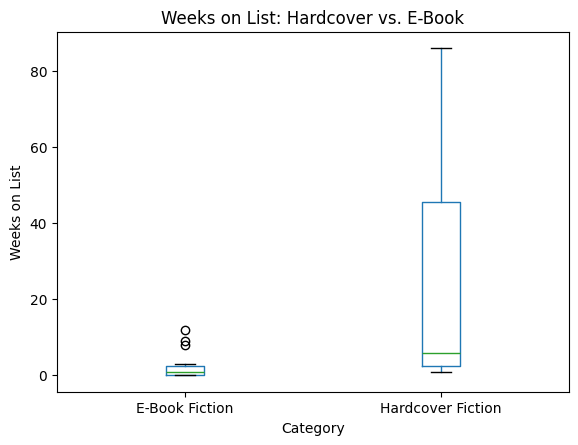

list_category rank_change         weeks_on_list    
                            mean min max          mean max
0     E-Book Fiction   -6.533333 -15   2      2.666667  12
1  Hardcover Fiction   -2.333333 -13   3     26.733333  86

In [96]:
def analyze_book_trends(merged_records):

    # Convert merged records to DataFrame
    columns = ["rank", "rank_last_week", "weeks_on_list", "title", "author", "publisher", "isbn", "description", "list_category"]
    df = pd.DataFrame(merged_records, columns=columns)

    # Select relevant columns
    df_filtered = df[["rank", "rank_last_week", "weeks_on_list", "list_category"]]

    # Calculate rank change (Positive = improved rank, Negative = dropped rank)
    df_filtered["rank_change"] = df_filtered["rank_last_week"] - df_filtered["rank"]

    # Compute summary statistics
    trends_summary = df_filtered.groupby("list_category").agg({
        "rank_change": ["mean", "min", "max"],
        "weeks_on_list": ["mean", "max"]
    }).reset_index()

    # Plot: Weeks on List Distribution by Category
    df_filtered.boxplot(column="weeks_on_list", by="list_category", grid=False)
    plt.title("Weeks on List: Hardcover vs. E-Book")
    plt.suptitle("")
    plt.xlabel("Category")
    plt.ylabel("Weeks on List")
    plt.show()

    # Display trends analysis table
    display(trends_summary)

# Run the analysis
analyze_book_trends(merged_records)


**Rank Change Trends**

E-Book Fiction has a larger average rank drop (-6.53) compared to Hardcover Fiction (-2.33).
- This suggests that E-Book Fiction bestsellers fluctuate more in rankings.

The biggest rank drop in E-Book Fiction was -15, while in Hardcover Fiction, it was -13.
- This indicates that E-Books tend to be more volatile than Hardcovers.

**Weeks on the Bestseller List**

E-Book Fiction books stay on the list for a much shorter period, with an average of 2.67 weeks and a maximum of 12 weeks.
- This suggests that E-Books have a shorter lifecycle on the bestseller list.

Hardcover Fiction books remain much longer, with an average of 26.73 weeks and a maximum of 86 weeks.
- This indicates that Hardcover Fiction books tend to have long-term popularity compared to E-Books.


4. Data Storage (Sqlite3)

In [83]:
# Convert API response JSON to sqlite table
def store_books(records, table_name, db_name="nyt_best_sellers.db"):
    if not records:
        print("No data to store.")
        return

    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Drop the table if it exists (to completely reset the data)
    cursor.execute(f"DROP TABLE IF EXISTS {table_name}")

    # Create table with an auto-incrementing 'id'
    cursor.execute(f"""
        CREATE TABLE {table_name} (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            rank INTEGER,
            rank_last_week INTEGER,
            weeks_on_list INTEGER,
            title TEXT,
            author TEXT,
            publisher TEXT,
            isbn TEXT UNIQUE,
            description TEXT,
            list_category TEXT
        )
    """)

    # Insert data (excluding 'id', so SQLite auto-generates it)
    cursor.executemany(f"""
        INSERT INTO {table_name} (rank, rank_last_week, weeks_on_list, title, author, publisher, isbn, description, list_category)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, records)

    conn.commit()
    conn.close()
    print(f" Data successfully stored in {db_name}, table: {table_name}")

In [87]:
store_books(merged_records, "NYT_Best_Sellers_Merged")

 Data successfully stored in nyt_best_sellers.db, table: NYT_Best_Sellers_Merged


In [88]:
def view_books(table_name, db_name="nyt_best_sellers.db"):
    conn = sqlite3.connect(db_name)
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
    conn.close()
    print(df)


In [89]:
view_books("NYT_Best_Sellers_Merged")

    id  rank  rank_last_week  weeks_on_list  \
0    1     1               0              1   
1    2     2               0              2   
2    3     3               4             12   
3    4     4               0              1   
4    5     5               7              9   
5    6     6               0              1   
6    7     7               9              3   
7    8     8               2              2   
8    9     9               0              1   
9   10    10               0              8   
10  11    11               0              0   
11  12    12               0              0   
12  13    13               0              0   
13  14    14               0              0   
14  15    15               0              0   
15  16     1               1              6   
16  17     2               0              1   
17  18     3               3             69   
18  19     4               2             84   
19  20     5               0              1   
20  21     6 

In [90]:

def sqlite_to_json(db_name, table_name, json_file):
    try:
        # Connect to SQLite database
        conn = sqlite3.connect(db_name)

        # Read data from the specified table
        df = pd.read_sql(f"SELECT * FROM {table_name}", conn)

        # Convert DataFrame to JSON (list of dictionaries)
        json_data = df.to_dict(orient="records")

        # Save JSON file
        with open(json_file, "w", encoding="utf-8") as f:
            json.dump(json_data, f, indent=4)

        # Close connection
        conn.close()

        print(f"SQLite table '{table_name}' successfully converted to JSON: {json_file}")

    except Exception as e:
        print(f"Error converting SQLite to JSON: {e}")

# Usage
db_name = "nyt_best_sellers.db"          # SQLite database file
table_name = "NYT_Best_Sellers_Merged"  # Table to convert
json_file = "nyt_books.json"       # Output JSON file

sqlite_to_json(db_name, table_name, json_file)


SQLite table 'NYT_Best_Sellers_Merged' successfully converted to JSON: nyt_books.json


5. Data Summarization

In [105]:
# Function to generate a summary of the transformed data
def data_summary(df):
    summary = {
        "Number of Records": df.shape[0],
        "Number of Columns": df.shape[1]
    }
    return summary


In [106]:
# Get the summary of ingested data
# Convert records to DataFrame
columns = ["rank", "rank_last_week", "weeks_on_list", "title", "author", "publisher", "isbn", "description"]
ebook_df = pd.DataFrame(ebook_records, columns=columns)
ebook_summary = data_summary(ebook_df)
display(ebook_summary)

hardcover_df = pd.DataFrame(hardcover_records, columns=columns)
hardcover_summary = data_summary(hardcover_df)
display(hardcover_summary)

{'Number of Records': 15, 'Number of Columns': 8}

{'Number of Records': 15, 'Number of Columns': 8}

In [107]:
# Get the summary of transformed data
# Convert records to DataFrame
columns = ["rank", "rank_last_week", "weeks_on_list", "title", "author", "publisher", "isbn", "description", "list_category"]
transformed_df = pd.DataFrame(merged_records, columns=columns)
transformed_summary = data_summary(transformed_df)
display(transformed_summary)

{'Number of Records': 30, 'Number of Columns': 9}